In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd

In [11]:
# Load digit dataset from local CSV file
dataset = pd.read_csv("C:\\Users\\wilfr\\Downloads\\train.csv")  # Update with your local file path

data = dataset.iloc[:, 1:].values  # Pixel values
labels = dataset.iloc[:, 0].values  # Digits (0-9)

# Normalize pixel values (0-255 -> 0-1)
data = data / 255.0


In [12]:
# One-hot encode labels
labels = to_categorical(labels, num_classes=10)

# Split dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the model
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model


In [13]:
# Train with RMSprop
model_rmsprop = create_model()
model_rmsprop.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train with Adam
model_adam = create_model()
model_adam.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


C:\Users\wilfr\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8556 - loss: 0.4953 - val_accuracy: 0.9506 - val_loss: 0.1672
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9580 - loss: 0.1379 - val_accuracy: 0.9580 - val_loss: 0.1414
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9713 - loss: 0.0951 - val_accuracy: 0.9674 - val_loss: 0.1147
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9788 - loss: 0.0708 - val_accuracy: 0.9695 - val_loss: 0.1119
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9839 - loss: 0.0539 - val_accuracy: 0.9685 - val_loss: 0.1273
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9869 - loss: 0.0423 - val_accuracy: 0.9727 - val_loss: 0.1078
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9904 - loss: 0.0338 - val_accuracy: 0.9700 - val_loss: 0.1254
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9903 - loss: 0.0288 - 

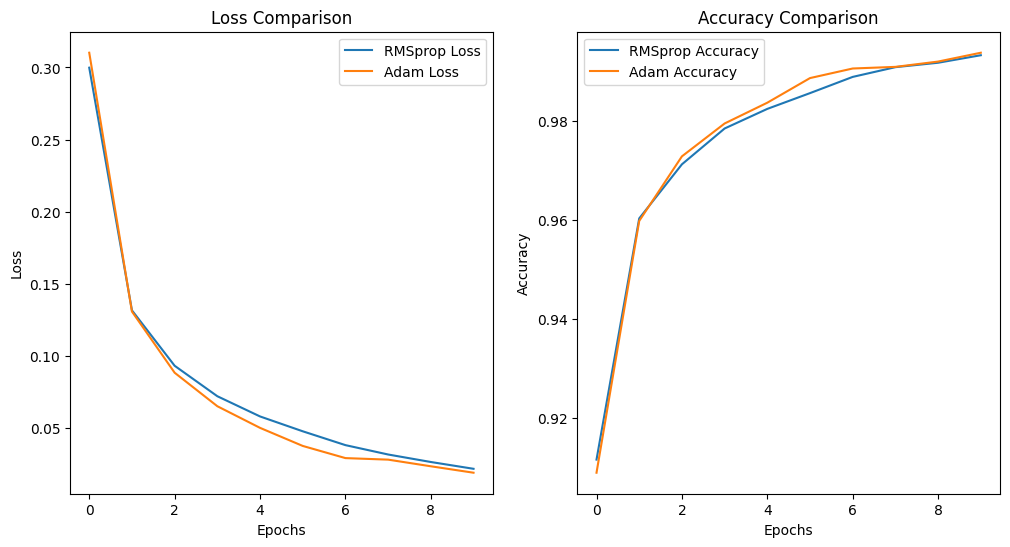

In [14]:
# Plot loss and accuracy comparison
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_rmsprop.history['loss'], label='RMSprop Loss')
plt.plot(history_adam.history['loss'], label='Adam Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop Accuracy')
plt.plot(history_adam.history['accuracy'], label='Adam Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Comparison')

plt.show()

In [15]:

# Compare final accuracy
final_accuracy_rmsprop = history_rmsprop.history['accuracy'][-1]
final_accuracy_adam = history_adam.history['accuracy'][-1]
print(f"Final Accuracy with RMSprop: {final_accuracy_rmsprop:.4f}")
print(f"Final Accuracy with Adam: {final_accuracy_adam:.4f}")

Final Accuracy with RMSprop: 0.9933
Final Accuracy with Adam: 0.9938
